# Seq2Seq with Attention

## Introduction


In the last tutorial, we used the Seq2Seq model which contains an encoder and decoder. The encoder is used to memorize the input sentence and feed it to the decoder. I used the Seq2Seq model to translate from Arabic to English https://github.com/MarwaMohammad/Seq2SeqModel_repo/blob/main/Seq2SeqModel.ipynb
 
The Seq2Seq was considered a big step towards generating a new sequence based on the input sequence.  it has some drawbacks, like, in case the input to the encoder is a little long sentence. the decoder can't memorize all the input sentence words. For example, in translation example, if the encoder has a long Arabic sentence the decoder can't memorize the whole sentence words embeddings inside the context vector which will be fed to the decoder after that.


Mainly, the human translation also doesn't like that. If we asked the translator to translate the long sentence, the translator divides the sentence into smaller parts and translates each part 'means a few tokens' together beacuse it will be difficult to memorize the whole sentence.

For this reason, the translation task performance using Seq2Seq has a good performance in short sentences, but its performance comes down in long sentences.

So, the solution for this is to divide the input sentence into tokens. Then, compute the attention vector weights for all encoder timsteps 'or for all your input tokens', and provide this attention vector to the intended decoder cell. So that this will help this decoder cell to give more attention to the intended token like the human translator exactly. Let's understand how this can be done mathematically using deep learning.

## Attention Mechanism:

We will devide it into steps to more easier,

### 1st step: obtainning the Encoder the Hidden States 

Feed the input into encoder and obtain the encoder the hidden states for each input token

![title](img/encode_attention.png)


### 2nd step: Calculating the Attention scores

Pass the encoder hidden state (h) at all timesteps and decoder previous hidden state into a scoring function such as dot ptroduct to compute the similarity. The dot product will the return the similarity between the each encoder hidden state and the decoder hidden state.


![title](img/step2_attention.png)











In the above image all the encoder output hidden states of all LSTMs [h1,h2,h3,h4,h5] are passed to the score function 'dot product here' with the input hidden state to the 1st decoder cell as follows:

$ b_{01} = s_{0} • h_{1} = 11$

$ b_{02} = s_{0} • h_{2} = 4$

$ b_{03} = s_{0} • h_{3} = 4$

$ b_{04} = s_{0} • h_{4} = 2$

$ b_{05} = s_{0} • h_{5} = 0$

This operation will output a vector looks like this [$ b_{01},  b_{02}, b_{03}, b_{04}, b_{05}$] = [11, 4, 4, 2, 0]. These numbers indicate the importance of each hidden state in the encoder part to the output token at cell1 in the decoder part.

we notice that the $ b_{01}$ is the highest output value of the decoder output which indicates that the input token 'كيف' has a great effect on the output token 'how' in the decoder part.

Note:

The above operation will be repeated but with the next decoder hidden state so the dot product this time between encoder output hidden states of all LSTMs [h1,h2,h3,h4,h5] and $s_{1}$.

This operation will keep repeating until the end token

### 3rd Step: Normalizing the attention scores

The attention scores are normalized using softmax function to have values from 0 to 1

$ a_{ij} = \frac{exp(b_{ij})}{\sum \limits _{k=1} ^{T_{x}} exp(b_{ik}) }$

Notes:

$ b_{ij} $ is the influence of input token j in the prediction of output i which comes from the 2nd step.

$ T_{x} $ is the length of input tokens

$ a_{ij}$ is the probability of the output token $ y_{i}$ being alligned to the input $ x_{j}$

This operation of calculating the probability of the output token $ y_{1}$ being alligned to the input will be repeated for each time step or token $ x_{1}$, $ x_{2}$, $ x_{3}$, $ x_{4}$, $ x_{5}$ 

We will have $ a_{01}$, $ a_{02}$, $ a_{03}$, $ a_{04}$, $ a_{05}$ for each input token to 

The output of this step is as follows [$ a_{01}$, $ a_{02}$, $ a_{03}$, $ a_{04}$, $ a_{05}$] = [0.998, 0.00091, 0.00091, 0.00012,  0]


### 4th Step : Computing the context vector



Compute a context vector for the current decoder state by taking a weighted average over all the encoder hidden states.

$C_{i} = {\sum \limits _{j=1} ^{T_{x}} } a_{ij} x h_{j}$

The above context vector $C_{i}$ carries the weights of each input token to determine the output token at timestep i.

These steps from 1 to 4 will be repeated to obtain the context vector for each decoder timestep.

The attention mechanism enhances the neural machine translation.

We finally have a context vector that considers the information from the entire encoder states that is dynamically updated to reflect the needs of the decoder at each step of decoding. This context vector will be fed into the decoder cell as input as shown in the following diagram.


![title](img/context_vector_of_attention.png)

What I have illustrated above is the Bahdanau Attention Algorithm, but the Bahdanau attention used the BiLSTM. I used LSTM just for simplicity.

In Bahdanau Attention Algorithm, the decoder LSTM cell has the following inputs:

- The Previous outputs.
- The Previous hidden state.
- The context vector obtained from the $C_{i} = {\sum \limits _{j=1} ^{T_{x}} } a_{ij} x h_{j}$


To know more about Bahdanau Attention Algorithm please look at [The Bahdanau Attention Algorithm](https://machinelearningmastery.com/the-bahdanau-attention-mechanism/), [NEURAL MACHINE TRANSLATION BY JOINTLY LEARNING TO ALIGN AND TRANSLATE](https://arxiv.org/pdf/1409.0473.pdf)
 and [This book, page 224, Figure10.10](https://web.stanford.edu/~jurafsky/slp3/ed3book_jan122022.pdf)

There are some enhancement happened to Bahdanau Attention Algorithm which is called the Luong mechanism. Lets know the Luong mechanism in the next section.


## Luong mechanism

It improved the Bahdanau mechanism. It looks like the Bahdanau mechanism but with some differences, let's see similarities and differences:

- Step 1 is similar to Bahdanau.


- Step 2 which is calculating the Attention Scores, use the current hidden state instead of using the previous hidden state.


- Step 3 is similar to Bahdanau.


- Step 4 is similar to Bahdanau.


- Step 5: Calculating an attention hidden state which considered is a concatenation between the current decoder hidden state and the context vector.


Then feed this to the softmax function to obtain the output token. To read more please open [this, The Luong Attention Algorithm part](https://machinelearningmastery.com/the-luong-attention-mechanism/)

Note:
The steps from 1 to 5 will repeated until obtaining the end of the sequence.

Look at the following figure it will show all steps together:

![title](img/context_vector_of_attention_Loungh.png)


### Machine Translation using Seq2Seq with Attention Modeling:
I will use a simple version of Luong attention which will use the score function as dot product.

Lets import all our preprocessing code from the previous [Seq2Seq Notebook](https://github.com/MarwaMohammad/Seq2SeqModel_repo/blob/main/Seq2SeqModel.ipynb)


In [286]:
pip install arabic_reshaper
#pip install seaborn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\marwa\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [291]:
pip install python-bidi

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\marwa\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [292]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense,LSTM,Embedding,Input, Bidirectional, Concatenate, Dot, Activation
import io
from string import digits
import string
import tkseem as tk
# instantiate the Maximum Likelihood Disambiguator
from camel_tools.tokenizers.word import simple_word_tokenize
from camel_tools.disambig.mle import MLEDisambiguator
from camel_tools.tokenizers.morphological import MorphologicalTokenizer

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import arabic_reshaper
from bidi.algorithm import get_display

Obtaining the dataset for Arabic and English

In [2]:
def read_data(file):
    file_data = []
    data = []
    Arabic_data = []
    english_data = []
    # Read the file lines
    with open(file, 'r', encoding='utf-8') as f:
        file_data = f.readlines()
    # separate the lines using '\t'
    for line in (file_data):
        english_sent, arabic_sent, _ = line.split('\t')
        Arabic_data.append(arabic_sent)
        english_data.append(english_sent)
        
    return english_data, Arabic_data


In [3]:
file_path = 'datasets/ara-eng/ara.txt'
english_data,  Arabic_data= read_data(file_path)

In [4]:
english_data[0:10]

['Hi.',
 'Run!',
 'Duck!',
 'Duck!',
 'Duck!',
 'Help!',
 'Jump!',
 'Stop!',
 'Stop!',
 'Wait!']

In [5]:
Arabic_data[50:100]

['إلى اللقاء',
 'إنتظر',
 'لقد أتى.',
 'هو يجري',
 'ساعدني!',
 'النجدة! ساعدني!',
 'ساعدوني',
 'انتظر.',
 'أنا موافق',
 'أنا حزين.',
 'أنا أيضاً.',
 'اخرس!',
 'اصمت!',
 'اسكت!',
 'أغلق فمك!',
 'أوقفه',
 'خذه',
 'أخبرني',
 'توم فاز.',
 'لقد ربح توم.',
 'استيقظ!',
 'أهلاً و سهلاً!',
 'مرحباً بك!',
 'اهلا وسهلا',
 'مرحبا!',
 'من فاز؟',
 'من الذي ربح؟',
 'لم لا؟',
 'لما لا؟',
 'لا فكرة لدي',
 'استمتع بوقتك.',
 'أسرعا.',
 'لقد نسيت.',
 'فهمتُهُ.',
 'فهمتُها.',
 'فَهمتُ ذلك.',
 'أستخدمه.',
 'سأدفع أنا.',
 'أنا مشغول.',
 'إنني مشغول.',
 'أشعر بالبرد.',
 'أنا حُرّ.',
 'أنا هنا',
 'لقد عدت إلى البيت',
 'أنا فقير.',
 'أنا ثري.',
 'هذا مؤلم',
 'انها جافه',
 'الجو حار',
 'إنه جديد']

In [6]:
len(Arabic_data)

12158

In [7]:
len(english_data)

12158

We have 12158 line in both

In [8]:
dataset = pd.DataFrame({'Arabic_input':Arabic_data, 'English_target':english_data})

In [9]:
dataset.head()

,Arabic_input,English_target
0,مرحبًا.,Hi.
1,اركض!,Run!
2,اخفض رأسك!,Duck!
3,اخفضي رأسك!,Duck!
4,اخفضوا رؤوسكم!,Duck!


### Text Preprocessing

#### Arabic Normalization
The Arabic has a special preprocessing, why?

Arabic has difirrent characteristics like:
- The word in Arabic can mean a complete sentence in other languages. So, it requires a special segmentation step which considers the Arabic language rules. 
- Arabic has diactrics which should be normalized. 
- Some Aabic letters has more than one shape so, it should be unified.

If you would like to know more about Arabic charasteristics, please read this part  "Arabic Challenges in the Context of NER" in the the following paper:

https://thescipub.com/pdf/jcssp.2020.117.125.pdf


In [10]:
# from the following repo: https://github.com/motazsaad/process-arabic-text/blob/master/clean_arabic_text.py
import re
import string
import sys
import argparse

arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)


def normalize_arabic(text):
    #text = re.sub("[إأآا]", "ا", text)

    #text = re.sub("ى", "ي", text)
    #text = re.sub("ؤ", "ء", text)
    #text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

def remove_digits(text):
    text = re.sub(r"[1234567890١٢٣٤٥٦٧٨٩٠]+", "", text)
    return text

def remove_english_characters(text):
    text = re.sub(r'[a-zA-Z]+','',text)
    return text
    

def remove_diacritics(text):
    text = re.sub(arabic_diacritics, '', text)
    return text


def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)


In [11]:
def Arabic_normalization(Arabic_sentence_list):
    Arabic_data_list = []
    for item in Arabic_sentence_list:
        text = remove_english_characters(item)
        text = remove_digits(text)
        text = normalize_arabic(text)
        text = remove_diacritics(text)
        text = remove_punctuations(text)
        Arabic_data_list.append(text)
        
    return Arabic_data_list    
 

In [12]:
dataset['Arabic_input'] = Arabic_normalization(dataset.Arabic_input)

In [13]:
dataset['Arabic_input'][:10]

0            مرحبا
1             اركض
2        اخفض رأسك
3       اخفضي رأسك
4    اخفضوا رؤوسكم
5           النجده
6             اقفز
7               قف
8            توقف 
9            إنتظر
Name: Arabic_input, dtype: object

#### English Normalization:


In [14]:
def English_normalization(English_target_ls):
    English_data_list = []
    # Since we work on word level, if we normalize the text to lower case, this will reduce the vocabulary. 
    #It's easy to recover the case later. 
    English_data_list = English_target_ls.apply(lambda x: x.lower())

    # Clean up punctuations and digits. Such special chars are common to both domains, and can just be copied with no error.
    exclude = set(string.punctuation)
    English_data_list = English_data_list.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

    remove_digits = str.maketrans('', '', digits)
    English_data_list = English_data_list.apply(lambda x: x.translate(remove_digits))
    
    return English_data_list


In [15]:
dataset['English_target'] = English_normalization(dataset.English_target)

In [16]:
dataset.head()

,Arabic_input,English_target
0,مرحبا,hi
1,اركض,run
2,اخفض رأسك,duck
3,اخفضي رأسك,duck
4,اخفضوا رؤوسكم,duck


### Data preparation:
In this step we start to convert the data for training. 
- Adding the start and end token to the target language.Since the english is our target, so we will add the start and tokens to it. lets see how can we do this?

In [17]:
st_tok = 'START_'
end_tok = '_END'
def data_prep():
    dataset.English_target = dataset.English_target.apply(lambda x : st_tok + ' ' + x + ' ' + end_tok)

In [18]:
data_prep()

In [19]:
dataset.head()

,Arabic_input,English_target
0,مرحبا,START_ hi _END
1,اركض,START_ run _END
2,اخفض رأسك,START_ duck _END
3,اخفضي رأسك,START_ duck _END
4,اخفضوا رؤوسكم,START_ duck _END


- Tokenization
Arabic tokenization is completely diffrent from English tokenization. English tokenization depends on spaces, but in Arabic this is not valid. Since the token in Arabic can be used to mean a complete sentence in another languages.

Note, I used her the camel_tools which is not

#### Arabic Tokenization

In [20]:
from camel_tools.tokenizers.word import simple_word_tokenize

def tokenize_Arabic():
    # The tokenizer expects pre-tokenized text
    Arabic_input_ls = dataset.Arabic_input.apply(simple_word_tokenize)

    # Load a pretrained disambiguator to use with a tokenizer
    mle = MLEDisambiguator.pretrained('calima-msa-r13')

    # By specifying `split=True`, the morphological tokens are output as seperate
    # strings.
    tokenizer = MorphologicalTokenizer(mle,scheme='d3tok', split=True)
    Arabic_input_ls = Arabic_input_ls.apply(tokenizer.tokenize)
    
    return Arabic_input_ls



In [21]:
def remove_plus(tokens):
    sentence_ls = []
    for token in tokens:
        if '+' in token:
            token_without_plus = token.replace('+','')
            sentence_ls.append(token_without_plus) 
        else:
            sentence_ls.append(token) 

            
    return sentence_ls
#Arabic_input_ls = Arabic_input_ls.apply(remove_plus)

In [22]:
tokenized_ds_copy = dataset.copy()
tokenized_ds_copy.head()

,Arabic_input,English_target
0,مرحبا,START_ hi _END
1,اركض,START_ run _END
2,اخفض رأسك,START_ duck _END
3,اخفضي رأسك,START_ duck _END
4,اخفضوا رؤوسكم,START_ duck _END


Note: The camel tool returned the hamza letter again but in a unified way for all the words. I mean the same word can't exist in two difrrent spellings.
#### English tokenization
English is tokenized according to spaces. 

In [23]:
def tok_split_word2word(data):
    return data.split(' ')


#### Tokenization

In [24]:

def data_stats(tokenized_ds_copy):
    #Obtain the tokenized words in Arabic
    tokenized_ds_copy['Arabic_input'] = tokenize_Arabic()
    # The tokenization output has + in the separated token, which should be removed
    tokenized_ds_copy['Arabic_input'] = tokenized_ds_copy.Arabic_input.apply(remove_plus)
    
    #create a set to hold all Arabic words uniquely.
    input_tokens=set()
    for item in tokenized_ds_copy.Arabic_input:
        for tok in item:
            input_tokens.add(tok)
    
    #Obtain the tokenized words in English dataset
    tokenized_ds_copy['English_target'] = tokenized_ds_copy.English_target.apply(tok_split_word2word)
    
    #create a set to hold all English words uniquely.
    target_tokens=set()
    for item in tokenized_ds_copy.English_target:
        for tok in item:
            target_tokens.add(tok)
        
    input_tokens = sorted(list(input_tokens))
    target_tokens = sorted(list(target_tokens))


    
    num_encoder_tokens = len(input_tokens)
    num_decoder_tokens = len(target_tokens)
    
    #To obtin the maximum number of words inside Arabic and English dataset.
    max_encoder_seq_length = np.max([len(l) for l in tokenized_ds_copy.Arabic_input])
    max_decoder_seq_length = np.max([len(l) for l in tokenized_ds_copy.English_target])

    return input_tokens, target_tokens, num_encoder_tokens, num_decoder_tokens, max_encoder_seq_length, max_decoder_seq_length



In [25]:
input_tokens, target_tokens, num_encoder_tokens, num_decoder_tokens, max_encoder_seq_length, max_decoder_seq_length  = data_stats(tokenized_ds_copy)

In [26]:
print('Number of samples:', len(dataset))
print('Number of unique input tokens:', num_encoder_tokens)
print('Number of unique output tokens:', num_decoder_tokens)
print('Max sequence length for inputs:', max_encoder_seq_length)
print('Max sequence length for outputs:', max_decoder_seq_length)

Number of samples: 12158
Number of unique input tokens: 7205
Number of unique output tokens: 4298
Max sequence length for inputs: 52
Max sequence length for outputs: 36


### Vectorization

In this step we will build our vocab2int table which will be used to map between words and their indices.'Machine Learning can't work directly with words since computer doen't understand words, so it should be converted into numbers'.

Note that the pad and separation should be considered during obtaining the vocab2int.

In [27]:
pad_tok = 'PAD'
sep_tok = ' '
special_tokens = [pad_tok, sep_tok, st_tok, end_tok] 

#Increase the number of token by the number of special characters.
num_encoder_tokens += len(special_tokens)
num_decoder_tokens += len(special_tokens)


In [28]:
def vocab(input_tokens, target_tokens):
    input_token_index = {}
    target_token_index = {}
    for i,tok in enumerate(special_tokens):
        input_token_index[tok] = i
        target_token_index[tok] = i 

    offset = len(special_tokens)
    for i, tok in enumerate(input_tokens):
        input_token_index[tok] = i+offset

    for i, tok in enumerate(target_tokens):
        target_token_index[tok] = i+offset
   
    # Reverse-lookup token index to decode sequences back to something readable.
    reverse_input_tok_index = dict(
        (i, tok) for tok, i in input_token_index.items())
    reverse_target_tok_index = dict(
        (i, tok) for tok, i in target_token_index.items())
    return input_token_index, target_token_index, reverse_input_tok_index, reverse_target_tok_index

In [29]:
input_token_index, target_token_index, reverse_input_tok_index, reverse_target_tok_index = vocab(input_tokens, target_tokens)

In [30]:
input_token_index

{'PAD': 0,
 ' ': 1,
 'START_': 2,
 '_END': 3,
 'NOAN': 4,
 'آب': 5,
 'آباء': 6,
 'آبد': 7,
 'آبقو': 8,
 'آت': 9,
 'آتون': 10,
 'آتي': 11,
 'آثار': 12,
 'آخذ': 13,
 'آخر': 14,
 'آخرة': 15,
 'آخرعلي': 16,
 'آخرون': 17,
 'آخرين': 18,
 'آدم': 19,
 'آذار': 20,
 'آذان': 21,
 'آذيتم': 22,
 'آراء': 23,
 'آرية': 24,
 'آسفون': 25,
 'آسيا': 26,
 'آفاق': 27,
 'آكل': 28,
 'آلاف': 29,
 'آلام': 30,
 'آلة': 31,
 'آلن': 32,
 'آلي': 33,
 'آليا': 34,
 'آمال': 35,
 'آمل': 36,
 'آمن': 37,
 'آمنة': 38,
 'آن': 39,
 'آنا': 40,
 'آنذاك': 41,
 'آنس': 42,
 'آني': 43,
 'آية': 44,
 'أ': 45,
 'أأريتها': 46,
 'أأشتري': 47,
 'أأنت': 48,
 'أؤجر': 49,
 'أؤذي': 50,
 'أؤكد': 51,
 'أؤلف': 52,
 'أؤمن': 53,
 'أإلى': 54,
 'أاصيب': 55,
 'أب': 56,
 'أبإمكانك': 57,
 'أبا': 58,
 'أبتاع': 59,
 'أبتز': 60,
 'أبتسم': 61,
 'أبتل': 62,
 'أبحار': 63,
 'أبحث': 64,
 'أبد': 65,
 'أبدأ': 66,
 'أبدا': 67,
 'أبدو': 68,
 'أبدوا': 69,
 'أبدين': 70,
 'أبذل': 71,
 'أبر': 72,
 'أبرد': 73,
 'أبريل': 74,
 'أبشع': 75,
 'أبعد': 76,
 'أبق': 77,
 'أبق

I will put the max_encoder_seq for both decoder and encoder with 64 since the max number of tokens in Arabic is 52 and in English is 34

In [31]:
max_encoder_seq_length = 64
max_decoder_seq_length = 64

In [32]:
dataset.head()

,Arabic_input,English_target
0,مرحبا,START_ hi _END
1,اركض,START_ run _END
2,اخفض رأسك,START_ duck _END
3,اخفضي رأسك,START_ duck _END
4,اخفضوا رؤوسكم,START_ duck _END


In [33]:
def init_input_target(dataset, max_encoder_seq_length, max_decoder_seq_length, num_decoder_tokens):
    # The input setence to the encoder is 64 leghth.
    encoder_input_data = np.zeros( (len(dataset.Arabic_input), max_encoder_seq_length),dtype='float32')
    # The input setence to the decoder is 64 leghth.
    decoder_input_data = np.zeros((len(dataset.English_target), max_decoder_seq_length), dtype='float32')
    # The output setence of the decoder is 64 x all_tokens_inside_encoder. Since the decoder will do softmax for each token.
    decoder_target_data = np.zeros((len(dataset.English_target), max_decoder_seq_length, num_decoder_tokens), dtype='float32')
    
    return encoder_input_data, decoder_input_data, decoder_target_data

In [34]:
encoder_input_data, decoder_input_data, decoder_target_data = init_input_target(dataset, max_encoder_seq_length, max_decoder_seq_length, num_decoder_tokens)

In [35]:
def vectorize(tokenized_ds_copy, max_encoder_seq_length, max_decoder_seq_length, num_decoder_tokens):

    for i, (input_text_ls, target_text_ls) in enumerate(zip(tokenized_ds_copy.Arabic_input, tokenized_ds_copy.English_target)):
        # preparing the encoder inputs
        for t, tok in enumerate(input_text_ls):
            #To obtain the ids of encoder sentence's tokens from input_token_index
            encoder_input_data[i, t] = input_token_index[tok]
            
        encoder_input_data[i, t+1:] = input_token_index[pad_tok]
        
        # This loop is used to prepare the input and output of the decoder
        for t, tok in enumerate(target_text_ls):
            #1- prepare the decoder input
            #To obtain the ids of decoder sentence's tokens from target_token_index
            decoder_input_data[i, t] = target_token_index[tok]    
            
            # To obtain the decoder output
            if t > 0:
                # decoder_target_data will be ahead by one timestep
                # and will not include the start character.
                #We put 1 in the place of the expected word
                decoder_target_data[i, t - 1, target_token_index[tok]] = 1.
        decoder_input_data[i, t+1:] = target_token_index[pad_tok] 
        decoder_target_data[i, t:, target_token_index[pad_tok]] = 1.          
              
    return encoder_input_data, decoder_input_data, decoder_target_data              

In [36]:
encoder_input_data, decoder_input_data, decoder_target_data = vectorize(tokenized_ds_copy, max_encoder_seq_length, max_decoder_seq_length, num_decoder_tokens)

In [37]:
encoder_input_data[0]

array([5490.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.], dtype=float32)

In [38]:
input_token_index['مرحبا']

5490

Note: 

The 1st sentence in the Arabic_input column is 'مرحبا', and there is no any other word inside the sentence. If we printed the 1st place in encoder_input_data, we will find that there is only one word, this word took the same number of 'مرحبا 

In [39]:
decoder_input_data[0]

array([   5., 1802.,    6.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.], dtype=float32)

In [40]:
target_token_index['hi']

1802

In [41]:
target_token_index['START_']

5

In [42]:
target_token_index['_END']

6

Note:

    The 1st sentence in the decoder input is START_ hi _END, so there are only three tokens, each token has id. If we check the tokens ids inside the target_token_index, then we find that the decoder_input_data has the similar number in the location 0
    

In [43]:
# The _END location
decoder_target_data[0][1][0:10]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [44]:
# The hi location
decoder_target_data[0][0][1800:1810]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Note:

what should appear in the output of the decoder in this case is 'hi _END', we will find hi on gate 0 in the 3rd location, and _END on gate  1 n the 6th location.

### Mdeling

Here I will implement the encoder separated from decoder to simplify the operation. 

In [112]:
def build_training_encoder(num_encoder_tokens, emb_sz, lstm_sz, mask_zero):
    # 1- Define the input to the encoder
    encoder_inputs = Input(shape=(None,), dtype='float32')
    
    # 2- Define the embedding layer. This layer is built on the previous layer the input to the encoder.
    # This embedding layer need the following parameters 1- all the expected encoder tokens number. 2- embedding size of each word
    # The vector of each word output from embedding layer has this word charcteristics.
    en_x=  Embedding(num_encoder_tokens, emb_sz,mask_zero=mask_zero)(encoder_inputs)
    
    # 3- Define the 1st LSTM layer, 
    #This layer parametrs are:
    # 1- reurn_satate which enable us to output the cell state and the hidden state
    # 2- lstm_sz: which is the number of hidden units inside the LSTM layer.
    encoder = Bidirectional(LSTM(lstm_sz, return_state=True, return_sequences=True))
    
    # 4- Put the encoder LSTM on the embedding layer output 
    #and take the output and the hidden state of this Bi-LSTM which will be used to build the context vector
    encoder_outputs, state_f_h, state_f_c, state_b_h, state_b_c = encoder(en_x)
    
    # 5- Concatenate the output state from the forward and the backward together
    state_h = Concatenate()([state_f_h, state_b_h])# Bi LSTM
    # Concatenate the hidden state from the forward and the backward together
    state_c = Concatenate()([state_f_c, state_b_c])# Bi LSTM

    
    # We discard `encoder_outputs` and only keep the states.
    encoder_states = [state_h, state_c]
  
    # Inputs to the encoder model are tokens, and the output of the ecoder are the the output of the encoder and encoder states. 
    # In attention model we use encoder output and the encoder hidden states not only the states
    encoder_model = Model(encoder_inputs, [encoder_outputs] + encoder_states)
    print('\n The encoder model \n')
    encoder_model.summary()
          
    return encoder_model, encoder_states, encoder_inputs, encoder_outputs

In [113]:
# Set up the decoder, using `encoder_states` as initial state.
    
def build_training_decoder(num_decoder_tokens, emb_sz, lstm_sz, encoder_states, encoder_inputs, mask_zero, encoder_outputs):
        
    #1- define the input layer to the decoder.
    decoder_inputs = Input(shape=(None,))

    # 2- define the embeddding layer for the decoder/ In training it will take the expected tokens from the dataset
    # The embedding layer parameters are:
    # 1- All the expected tokens to the decoder.
    # 2- The embedding size
    decoder_embedding=  Embedding(num_decoder_tokens, emb_sz,mask_zero=mask_zero)

    # 3- Put the layer of embedding on the layer of decoder inputs. 
    embedding_output= decoder_embedding(decoder_inputs)

    
    # 4- Define the LSTM which should output the hidden state and cell state and cell output for each cell.
    # the hidden state and cell state which can be done enabling return_state
    # The output sequence of all the input sequence tokens can be done by enabling the return_sequences 
    decoder_lstm = LSTM(lstm_sz*2, return_sequences=True, return_state=True)

    
    # 5- Put the LSTM on the top of embedding layer and feed the context vector to the 'encoder_states'
    decoder_outputs, _, _ = decoder_lstm(embedding_output, initial_state=encoder_states)
    
    # 6- Define the dot product operation
    att_dot = Dot(axes=[2, 2])
    
    # 7- Obtaining the attention score obtained from dot product of encoder_outputs and decoder_outputs, 
    # Note this is a Loung mechanism which uses the current decoder output hidden state
    attention = att_dot([decoder_outputs, encoder_outputs])
    
    # 8- Define the Activation function
    att_activation = Activation('softmax', name='attention')
    
    # 9- Step 3: Normalizing the attention scores
    attention = att_activation(attention)
    print('attention', attention)
    
    # 10- Defin the dot product for Computing the context vector
    context_dot = Dot(axes=[2,1])
    
    # 11- Step 4: Computing the context vector by multiplying the normalization output and encoder outputs.
    context = context_dot([attention, encoder_outputs])
    
    # 12- Define the Concatenattion layer for the step 5
    att_context_concat = Concatenate()
    
    # 13- Step 5: concatenating the context and the decoder_outputs at the current state.
    decoder_combined_context = att_context_concat([context, decoder_outputs])

    # 14- Define the fully connected layer which predicts the output token.
    # This layer will output a vector. This vector has a probability for each expected token to output. 
    #Then this layer feeds this to an activation function 'softmax' to decide which word sould output at each timestep.
    decoder_dense = Dense(num_decoder_tokens, activation='softmax')

    # 15- Put the dense/fully connected layer on the top of lstm 
    #and feed the lstm output vector for all input tokens to the dense.
    decoder_outputs = decoder_dense(decoder_combined_context)
    
    # 16- Here build the combined model which takes the training tokens to the encoder and decoder and output the decoder output. 
    # This decoder output comes after the softmax of the dense layer
    combined_model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    
    print('\n The combined model \n')
    combined_model.summary()
    
    return combined_model, decoder_inputs, embedding_output, decoder_lstm, decoder_dense, att_dot, att_activation, context_dot, att_context_concat



In [114]:
# This function will use the same architecture of decoder in the training pahse, so we will use the followiing
# 1- decoder_input.
# 2- decoder_embedding_output. 
# 3- decoder_lstm
#4- decoder_dense
#why will we use the same architecture? since we will use the same cells but by using the inference methodology which is mentioned above.
def build_inference_decoder(num_decoder_tokens, lstm_sz, emb_sz, embedding_output, decoder_inputs, decoder_lstm,
                            decoder_dense, att_dot, att_activation, context_dot, att_context_concat):
    
    # Decoder model: Re-build based on explicit state inputs. Needed for step-by-step inference:
    # The encoder outputs which will be considered in attention calculation
    encoder_outputs = Input(shape=(None, lstm_sz*2,))
    
    # define the hidden state of the context vector which will come from the encoder in the prediction
    decoder_state_input_h = Input(shape=(lstm_sz*2,))# Bi LSTM
    # define the cell state of the context vector which will come from the encoder in the prediction
    decoder_state_input_c = Input(shape=(lstm_sz*2,))# Bi LSTM

    #define the hidden states which will feed into the decoder to initialize it. The values of this will be feed in the prediction.
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    
    # feed the decoder LSTM with embedding output, and inilize its state to decoder_states_inputs 
    #which will be fed after that with the encoder context vector.
    decoder_outputs2, state_h2, state_c2 = decoder_lstm(embedding_output, initial_state=decoder_states_inputs)
    
    # Define the input to the dense layer
    decoder_states2 = [state_h2, state_c2]
    
    # step2 : Attention score function with 'dot' score from Section 3.1 in the paper.
    attention = att_dot([decoder_outputs2, encoder_outputs])
    
    # Step3: Normalizing the attention scores. 
    # Note that we reuse Softmax-activation layer instead of writing tensor calculation
    attention = att_activation(attention)
    
    # step4: Calculating the context vector 
    context = context_dot([attention, encoder_outputs])
    
    # step5: Calculating an attention hidden state
    decoder_combined_context = att_context_concat([context, decoder_outputs2])

    # Feed the hidden and cell state to the dense layer which will predict the output.
    decoder_outputs2 = decoder_dense(decoder_combined_context)
    ##define the decoder_model which will take take the decoder inputs and ecoder outputs to make attention calculation
    # and initial state for the decoder.
    # this model will output the decoder output token with attention in addition to the hidden and cell states.
    decoder_model = Model([decoder_inputs, encoder_outputs] + decoder_states_inputs,
                          [decoder_outputs2, attention] + decoder_states2) 
    
    return decoder_model



In [117]:
emb_sz = 50
lstm_sz = 256
 
def model_seq_to_seq(batch_size, epochs,mask_zero):
    
    encoder_model, encoder_states, encoder_inputs, encoder_outputs = build_training_encoder(num_encoder_tokens, emb_sz, lstm_sz,mask_zero)
    combined_model, decoder_inputs, embedding_output, decoder_lstm, decoder_dense, att_dot, att_activation, context_dot, att_context_concat = build_training_decoder(num_decoder_tokens, emb_sz,
                                                                                                                                                                     lstm_sz, encoder_states, encoder_inputs,
                                                                                                                                                                     mask_zero, encoder_outputs)
    
    decoder_model = build_inference_decoder(num_decoder_tokens, lstm_sz, emb_sz, embedding_output, decoder_inputs,
                                            decoder_lstm, decoder_dense, att_dot, att_activation, context_dot, att_context_concat)

    
    # 8- compile the combined model in training phase
    combined_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

    combined_model.fit([encoder_input_data, decoder_input_data], decoder_target_data, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    
    return combined_model, encoder_model, decoder_model

In [118]:
combined_model, encoder_model, decoder_model = model_seq_to_seq(batch_size=64, epochs=100, mask_zero=True)


 The encoder model 

Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_47 (InputLayer)           [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_25 (Embedding)        (None, None, 50)     360450      input_47[0][0]                   
__________________________________________________________________________________________________
bidirectional_14 (Bidirectional [(None, None, 512),  628736      embedding_25[0][0]               
__________________________________________________________________________________________________
concatenate_36 (Concatenate)    (None, 512)          0           bidirectional_14[0][1]           
                                                                 bidi

Epoch 20/100
152/152 [==============================] - 264s 2s/step - loss: 0.0860 - acc: 0.8404 - val_loss: 1.0075 - val_acc: 0.2978
Epoch 21/100
152/152 [==============================] - 265s 2s/step - loss: 0.0759 - acc: 0.8645 - val_loss: 1.0228 - val_acc: 0.2958
Epoch 22/100
152/152 [==============================] - 267s 2s/step - loss: 0.0675 - acc: 0.8822 - val_loss: 1.0336 - val_acc: 0.2985
Epoch 23/100
152/152 [==============================] - 272s 2s/step - loss: 0.0588 - acc: 0.9020 - val_loss: 1.0515 - val_acc: 0.2978
Epoch 24/100
152/152 [==============================] - 271s 2s/step - loss: 0.0517 - acc: 0.9158 - val_loss: 1.0826 - val_acc: 0.2941
Epoch 25/100
152/152 [==============================] - 268s 2s/step - loss: 0.0446 - acc: 0.9279 - val_loss: 1.0970 - val_acc: 0.2962
Epoch 26/100
152/152 [==============================] - 273s 2s/step - loss: 0.0388 - acc: 0.9397 - val_loss: 1.1090 - val_acc: 0.2929
Epoch 27/100
152/152 [==============================] -

152/152 [==============================] - 274s 2s/step - loss: 0.0030 - acc: 0.9913 - val_loss: 1.4902 - val_acc: 0.3018
Epoch 81/100
152/152 [==============================] - 270s 2s/step - loss: 0.0028 - acc: 0.9915 - val_loss: 1.4648 - val_acc: 0.3014
Epoch 82/100
152/152 [==============================] - 271s 2s/step - loss: 0.0027 - acc: 0.9916 - val_loss: 1.4807 - val_acc: 0.3011
Epoch 83/100
152/152 [==============================] - 272s 2s/step - loss: 0.0028 - acc: 0.9918 - val_loss: 1.4834 - val_acc: 0.3023
Epoch 84/100
152/152 [==============================] - 274s 2s/step - loss: 0.0027 - acc: 0.9920 - val_loss: 1.5056 - val_acc: 0.3014
Epoch 85/100
152/152 [==============================] - 272s 2s/step - loss: 0.0027 - acc: 0.9915 - val_loss: 1.5084 - val_acc: 0.3032
Epoch 86/100
152/152 [==============================] - 272s 2s/step - loss: 0.0027 - acc: 0.9915 - val_loss: 1.5257 - val_acc: 0.3020
Epoch 87/100
152/152 [==============================] - 272s 2s/step

### Inferrence

In [260]:
def decode_sequence(input_seq, sep = ' '):
    # to obtain the encoder model
    # 1- Encode the input to obtain the context vector from the encoder.
    encoder_outputs, h, c = encoder_model.predict(input_seq)
    states_value = [h,c]
    
    # Generate empty target sequence of length 1 like this [[0]]
    target_seq = np.zeros((1,1))
    
    # Populate the first character of target sequence with the start character to be like [[5]]
    target_seq[0, 0] = target_token_index[st_tok]

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    
    attention_density = []
    # if you don't find end token
    while not stop_condition:
        #feed the predict() with the input to the decoder model which is target_seq and
        #the context vector from the encode which is states_value
        # output_tokens will hold the last output of the LSTM
        
        output_tokens, attention, h, c  = decoder_model.predict([target_seq, encoder_outputs] + states_value)
        attention_density.append(attention[0][0])# attention is max_sent_len x 1 since we have num_time_steps = 1 for the output        

        # Sample a token 
        # It returns the index of the maximum item in the 1st array last row
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        # return the word as letters from its index
        sampled_tok = reverse_target_tok_index[sampled_token_index]
        # form the sentence which consists of words and separatoe
        decoded_sentence += sep + sampled_tok

        # Exit condition: either hit max length which is 64
        # or find stop character.
        if (sampled_tok == end_tok or len(decoded_sentence) > 64):
            stop_condition = True

        # Update the target sequence (of length 1) with the index of the output token.
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update states to be fed to the prediction
        states_value = [h, c]
        
    attention_density = np.array(attention_density)
    return decoded_sentence, attention_density
 
    

In [261]:
for seq_index in range(100): #[14077,20122,40035,40064, 40056, 40068, 40090, 40095, 40100, 40119, 40131, 40136, 40150, 40153]:
    input_seq = encoder_input_data[seq_index: seq_index + 1]
    decoded_sentence, attention = decode_sequence(input_seq, sep = ' ')
    print('-')
    print('Input sentence:', dataset.Arabic_input[seq_index: seq_index + 1])
    print('Decoded sentence:', decoded_sentence)

-
Input sentence: 0    مرحبا
Name: Arabic_input, dtype: object
Decoded sentence:  hi _END
-
Input sentence: 1    اركض
Name: Arabic_input, dtype: object
Decoded sentence:  run _END
-
Input sentence: 2    اخفض رأسك
Name: Arabic_input, dtype: object
Decoded sentence:  duck _END
-
Input sentence: 3    اخفضي رأسك
Name: Arabic_input, dtype: object
Decoded sentence:  duck _END
-
Input sentence: 4    اخفضوا رؤوسكم
Name: Arabic_input, dtype: object
Decoded sentence:  duck _END
-
Input sentence: 5    النجده
Name: Arabic_input, dtype: object
Decoded sentence:  help _END
-
Input sentence: 6    اقفز
Name: Arabic_input, dtype: object
Decoded sentence:  jump _END
-
Input sentence: 7    قف
Name: Arabic_input, dtype: object
Decoded sentence:  stand up _END
-
Input sentence: 8    توقف 
Name: Arabic_input, dtype: object
Decoded sentence:  stop _END
-
Input sentence: 9    إنتظر
Name: Arabic_input, dtype: object
Decoded sentence:  wait _END
-
Input sentence: 10    داوم
Name: Arabic_input, dtype: object
Dec

-
Input sentence: 85    فهمت ذلك
Name: Arabic_input, dtype: object
Decoded sentence:  i got it _END
-
Input sentence: 86    أستخدمه
Name: Arabic_input, dtype: object
Decoded sentence:  im using it _END
-
Input sentence: 87    سأدفع أنا
Name: Arabic_input, dtype: object
Decoded sentence:  ill pay _END
-
Input sentence: 88    أنا مشغول
Name: Arabic_input, dtype: object
Decoded sentence:  im busy _END
-
Input sentence: 89    إنني مشغول
Name: Arabic_input, dtype: object
Decoded sentence:  im busy _END
-
Input sentence: 90    أشعر بالبرد
Name: Arabic_input, dtype: object
Decoded sentence:  im freezing _END
-
Input sentence: 91    أنا حر
Name: Arabic_input, dtype: object
Decoded sentence:  im free _END
-
Input sentence: 92    أنا هنا
Name: Arabic_input, dtype: object
Decoded sentence:  im here _END
-
Input sentence: 93    لقد عدت إلى البيت
Name: Arabic_input, dtype: object
Decoded sentence:  im home _END
-
Input sentence: 94    أنا فقير
Name: Arabic_input, dtype: object
Decoded sentence:  im

In [139]:
decoded_sentence_ls=[]
for seq_index in range(9700, 9800): #[14077,20122,40035,40064, 40056, 40068, 40090, 40095, 40100, 40119, 40131, 40136, 40150, 40153]:
    input_seq = encoder_input_data[seq_index: seq_index + 1]
    decoded_sentence, attention = decode_sequence(input_seq, sep = ' ')
    print('-')
    print('Input sentence:', dataset.Arabic_input[seq_index: seq_index + 1])
    print('Decoded sentence:', decoded_sentence)
    decoded_sentence_ls.append(decoded_sentence)

-
Input sentence: 9700    الحب و الكره شعوران متعاكسان
Name: Arabic_input, dtype: object
Decoded sentence:  love and hate are opposite emotions _END
-
Input sentence: 9701    ماتت عمتي منذ سنتين
Name: Arabic_input, dtype: object
Decoded sentence:  my aunt has been dead for two years _END
-
Input sentence: 9702    أعجبت عمتي بنجاحي
Name: Arabic_input, dtype: object
Decoded sentence:  my aunt was pleased with my success _END
-
Input sentence: 9703    فرحت عمتي بنجاحي
Name: Arabic_input, dtype: object
Decoded sentence:  my aunt was pleased with my success _END
-
Input sentence: 9704    مصروفات الدراسه بكليتي غاليه جدا
Name: Arabic_input, dtype: object
Decoded sentence:  my college tuition is too expensive _END
-
Input sentence: 9705    الدراسه بكليتي مكلفه جدا
Name: Arabic_input, dtype: object
Decoded sentence:  my college tuition is too expensive _END
-
Input sentence: 9706    سيأتي أولاد عمي بعد بضعه أيام
Name: Arabic_input, dtype: object
Decoded sentence:  my cousins are coming in a fe

-
Input sentence: 9758    توم في الخارج يسقي الأزهار
Name: Arabic_input, dtype: object
Decoded sentence:  tom has run at the airport _END
-
Input sentence: 9759    توم هو فقط من يمكنه فعل هذا
Name: Arabic_input, dtype: object
Decoded sentence:  tom is mary but mary isnt _END
-
Input sentence: 9760    توم فخور جدا بماري أليس كذلك
Name: Arabic_input, dtype: object
Decoded sentence:  tom is pretty but but isnt isnt _END
-
Input sentence: 9761    ليس توم هو الشخص المناسب للوظيفه
Name: Arabic_input, dtype: object
Decoded sentence:  tom isnt what the sports _END
-
Input sentence: 9762    توم يحب ماري ولكنها تحب جون
Name: Arabic_input, dtype: object
Decoded sentence:  tom and mary mary smiles _END
-
Input sentence: 9763    وعدني توم بأنه سيكون هنا قبل 
Name: Arabic_input, dtype: object
Decoded sentence:  tom promised to be here at  _END
-
Input sentence: 9764    توم أخبرني بأن لا أدخل المغاره
Name: Arabic_input, dtype: object
Decoded sentence:  tom told me to come abroad _END
-
Input sentence

### Visualization

Ploting the Attention scores help to debug your model.

In [301]:
def visualize_attention(text, encoder_model, decoder_model, max_encoder_seq_length, num_decoder_tokens, vocab_to_int, int_to_vocab, input_tokenized_sen, target_tokenized_sen, sep= ' '):

    encoder_input_data = np.zeros((1, max_encoder_seq_length), dtype='float32')
    
    
    for t, word in enumerate(input_tokenized_sen):
        encoder_input_data[0, t] = input_token_index[word]

    input_seq = encoder_input_data[0:1]

    decoded_sentence, attention_density = decode_sequence(input_seq, sep)
    decoded_sentence = decoded_sentence[1:]
    print('***')
    print(len(decoded_sentence))
    print(decoded_sentence)
    print(attention_density.shape)
    plt.clf()
    plt.figure(figsize=(28,12))
    
    arabic_sen = {get_display(arabic_reshaper.reshape(k)): k for k in input_tokenized_sen}

    
    ax = sns.heatmap(attention_density[:, : len(text) + 2], xticklabels=[w for w in arabic_sen],
                     yticklabels=[w for w in tok_split_word2word(decoded_sentence)], annot=True)

    ax.invert_yaxis()
    plt.show()
    
    return decoded_sentence

In [302]:
tokenized_ds_copy.head()

,Arabic_input,English_target
0,[مرحبا],"[START_, hi, _END]"
1,[أركض],"[START_, run, _END]"
2,"[أخفض, رأس, ك]","[START_, duck, _END]"
3,"[اخفضي, رأس, ك]","[START_, duck, _END]"
4,"[اخفضوا, رؤوس, كم]","[START_, duck, _END]"


In [303]:
dataset.head()

,Arabic_input,English_target
0,مرحبا,START_ hi _END
1,اركض,START_ run _END
2,اخفض رأسك,START_ duck _END
3,اخفضي رأسك,START_ duck _END
4,اخفضوا رؤوسكم,START_ duck _END


-
Input sentence: مرحبا
GT sentence: START_ hi _END
***
7
hi _END
(2, 64)


<Figure size 432x288 with 0 Axes>

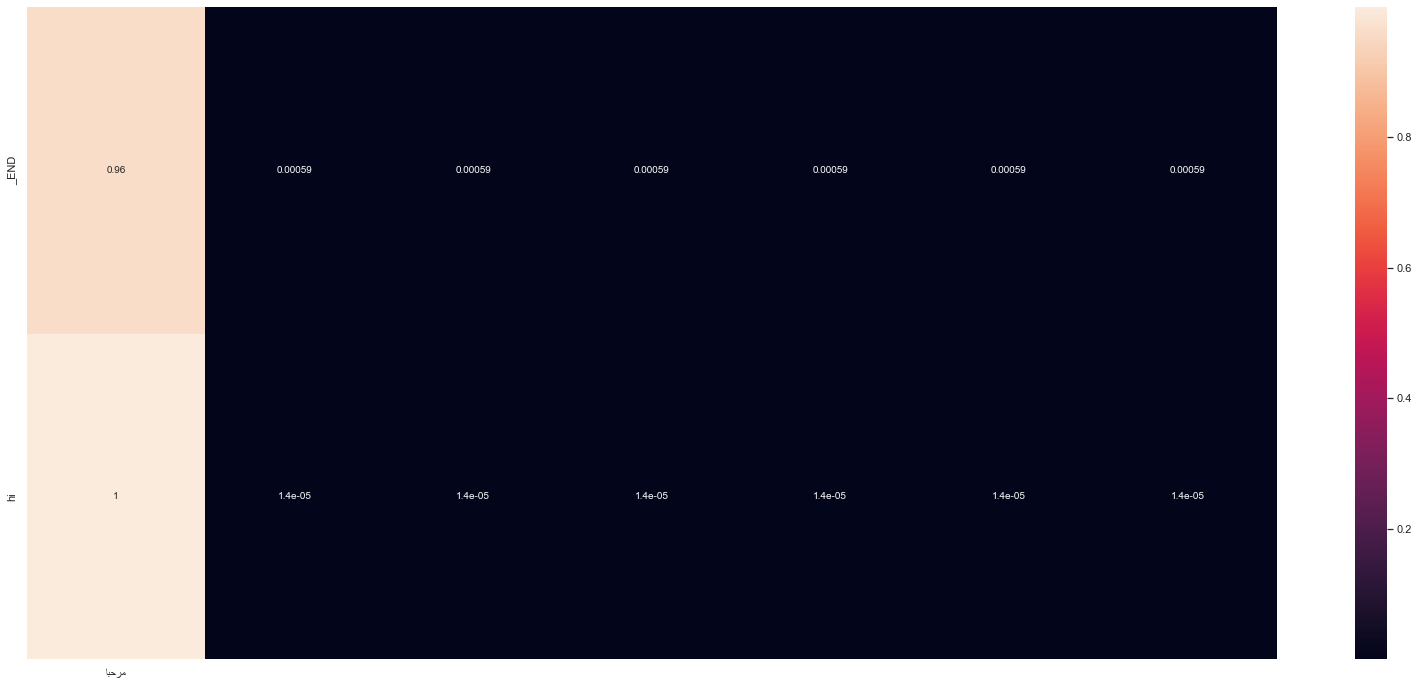

Decoded sentence: hi _END
-
Input sentence: اركض
GT sentence: START_ run _END
***
8
run _END
(2, 64)


<Figure size 432x288 with 0 Axes>

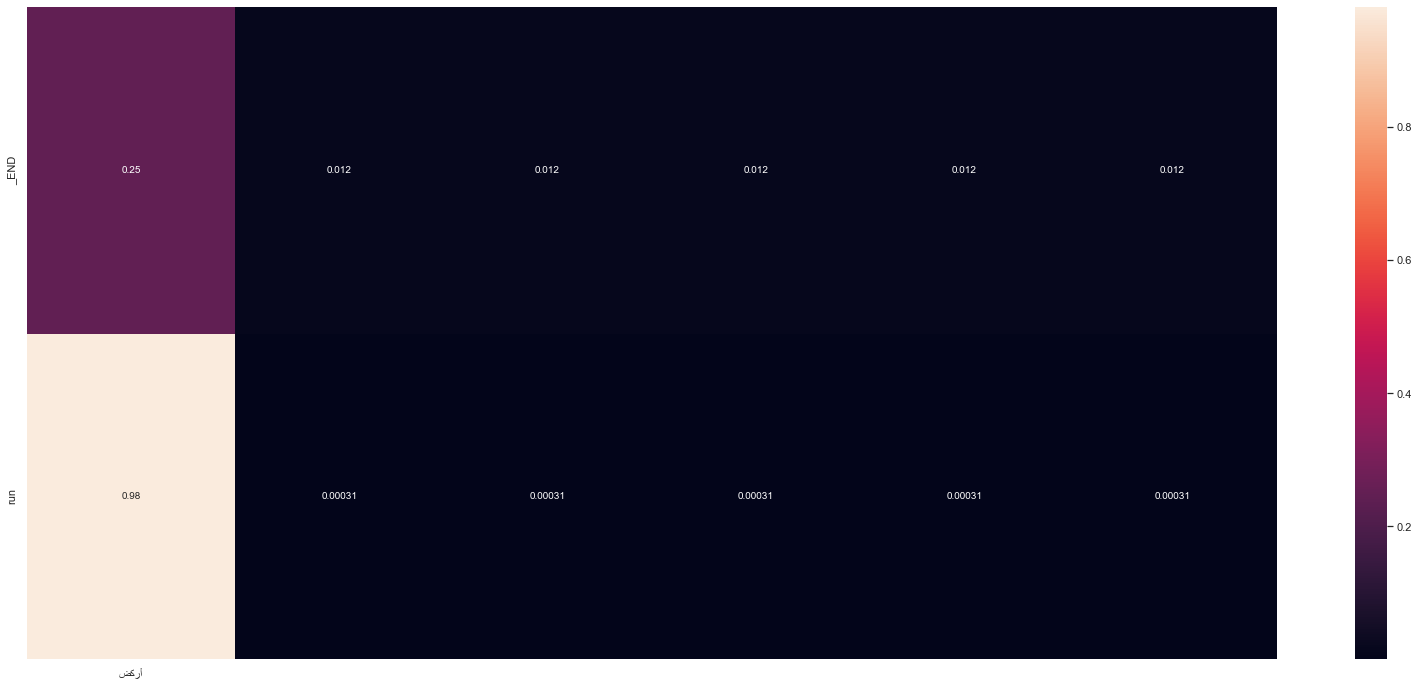

Decoded sentence: run _END
-
Input sentence: اخفض رأسك
GT sentence: START_ duck _END
***
9
duck _END
(2, 64)


<Figure size 432x288 with 0 Axes>

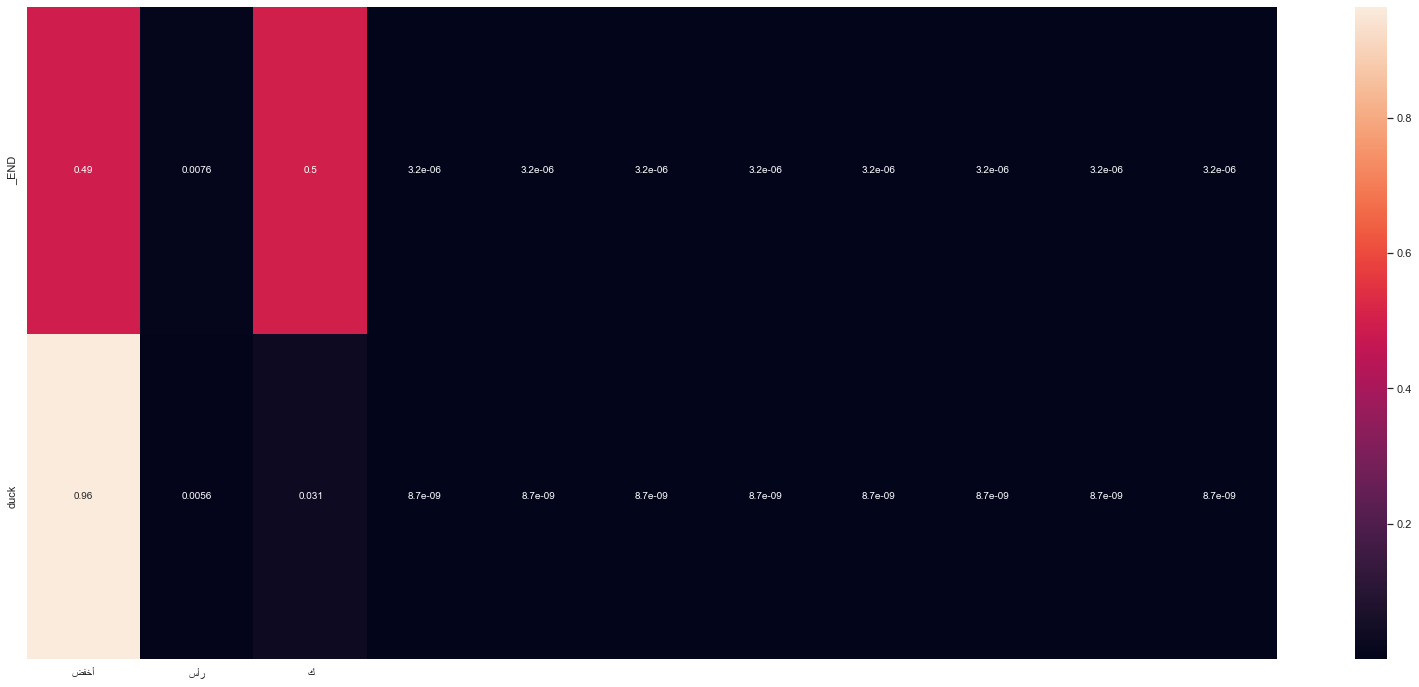

Decoded sentence: duck _END
-
Input sentence: اخفضي رأسك
GT sentence: START_ duck _END
***
9
duck _END
(2, 64)


<Figure size 432x288 with 0 Axes>

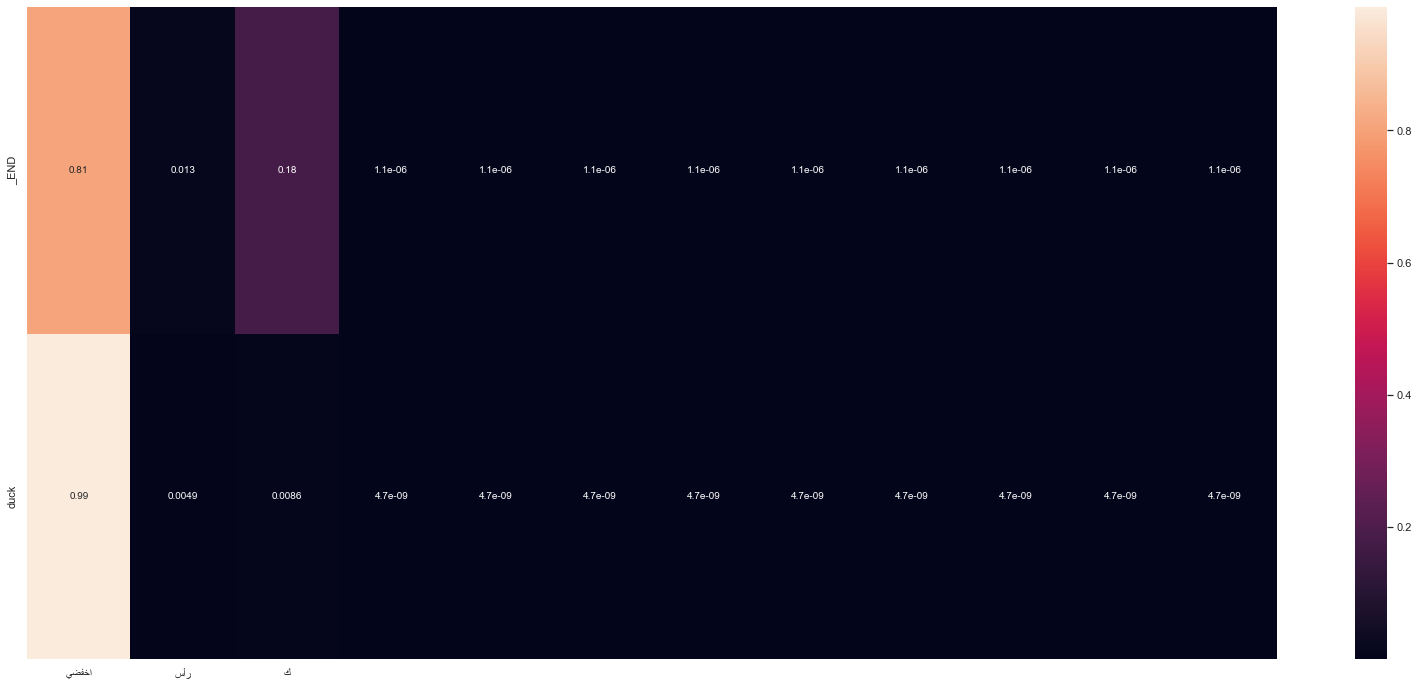

Decoded sentence: duck _END
-
Input sentence: اخفضوا رؤوسكم
GT sentence: START_ duck _END
***
9
duck _END
(2, 64)


<Figure size 432x288 with 0 Axes>

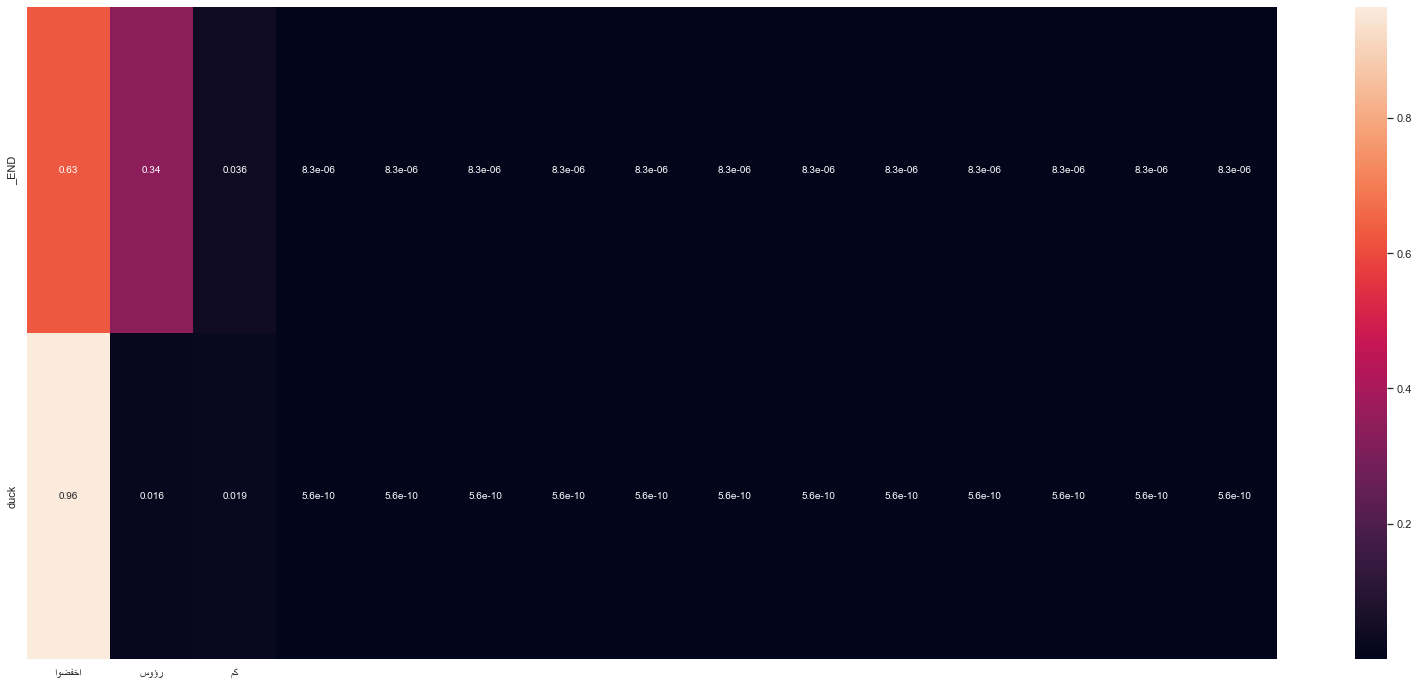

Decoded sentence: duck _END
-
Input sentence: النجده
GT sentence: START_ help _END
***
9
help _END
(2, 64)


<Figure size 432x288 with 0 Axes>

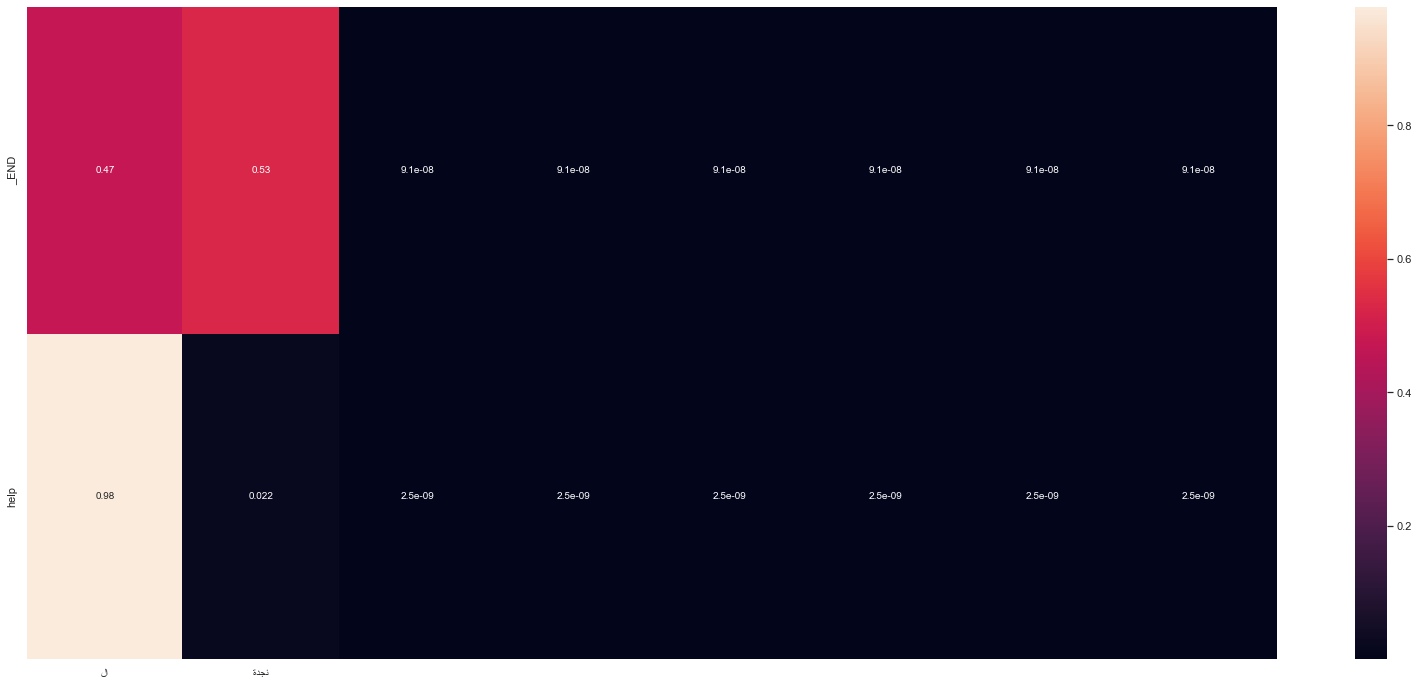

Decoded sentence: help _END
-
Input sentence: اقفز
GT sentence: START_ jump _END
***
9
jump _END
(2, 64)


<Figure size 432x288 with 0 Axes>

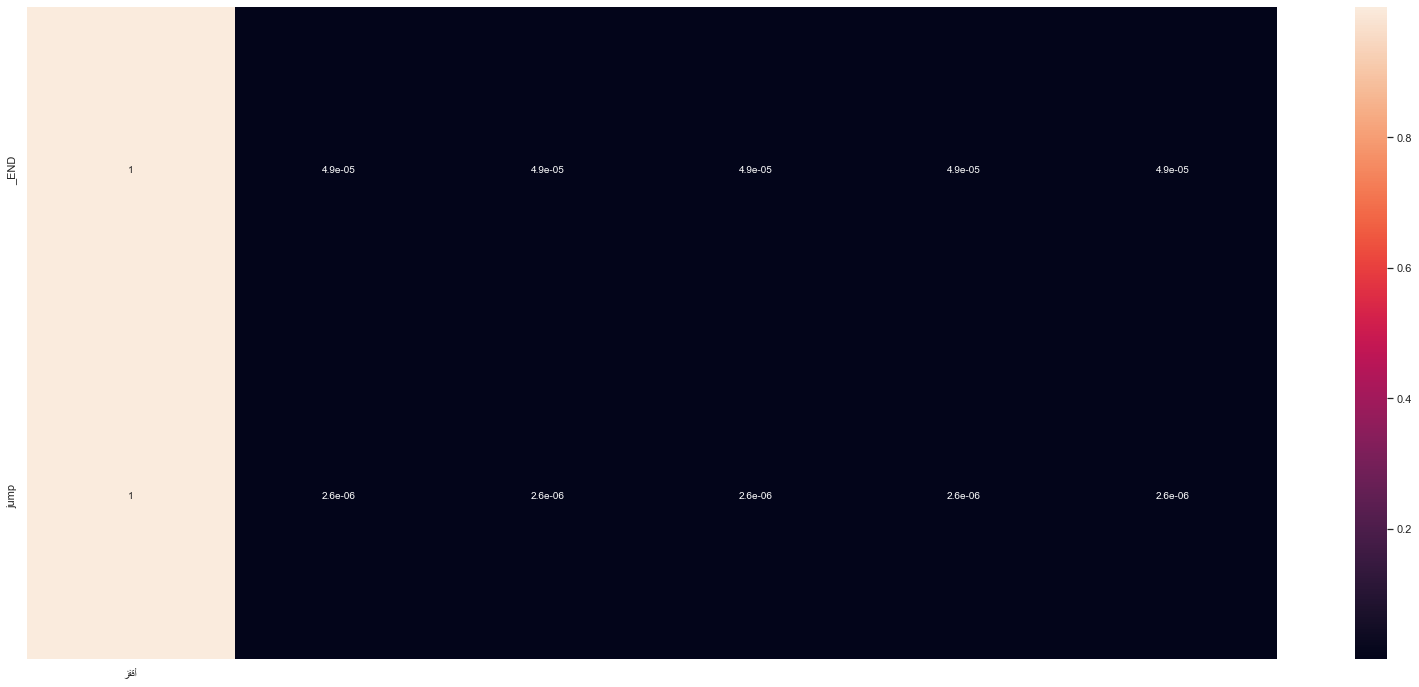

Decoded sentence: jump _END
-
Input sentence: قف
GT sentence: START_ stop _END
***
13
stand up _END
(3, 64)


<Figure size 432x288 with 0 Axes>

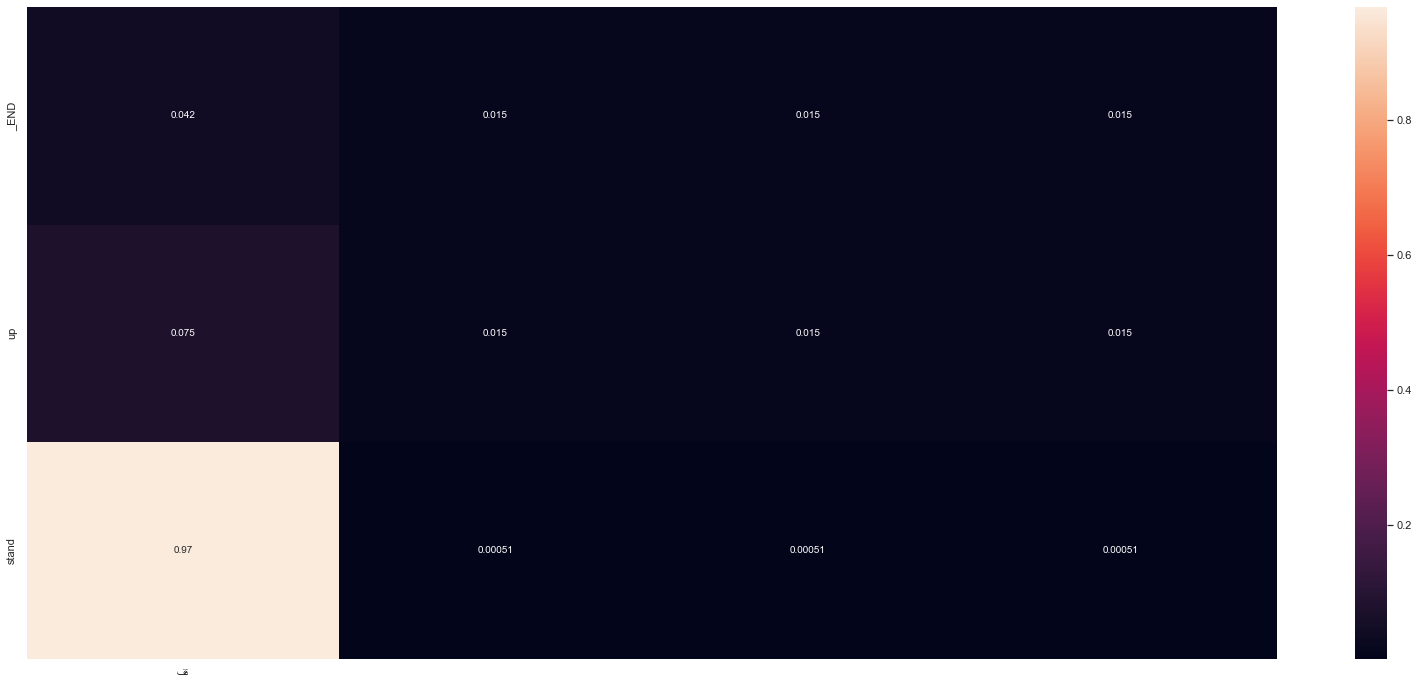

Decoded sentence: stand up _END
-
Input sentence: توقف 
GT sentence: START_ stop _END
***
9
stop _END
(2, 64)


<Figure size 432x288 with 0 Axes>

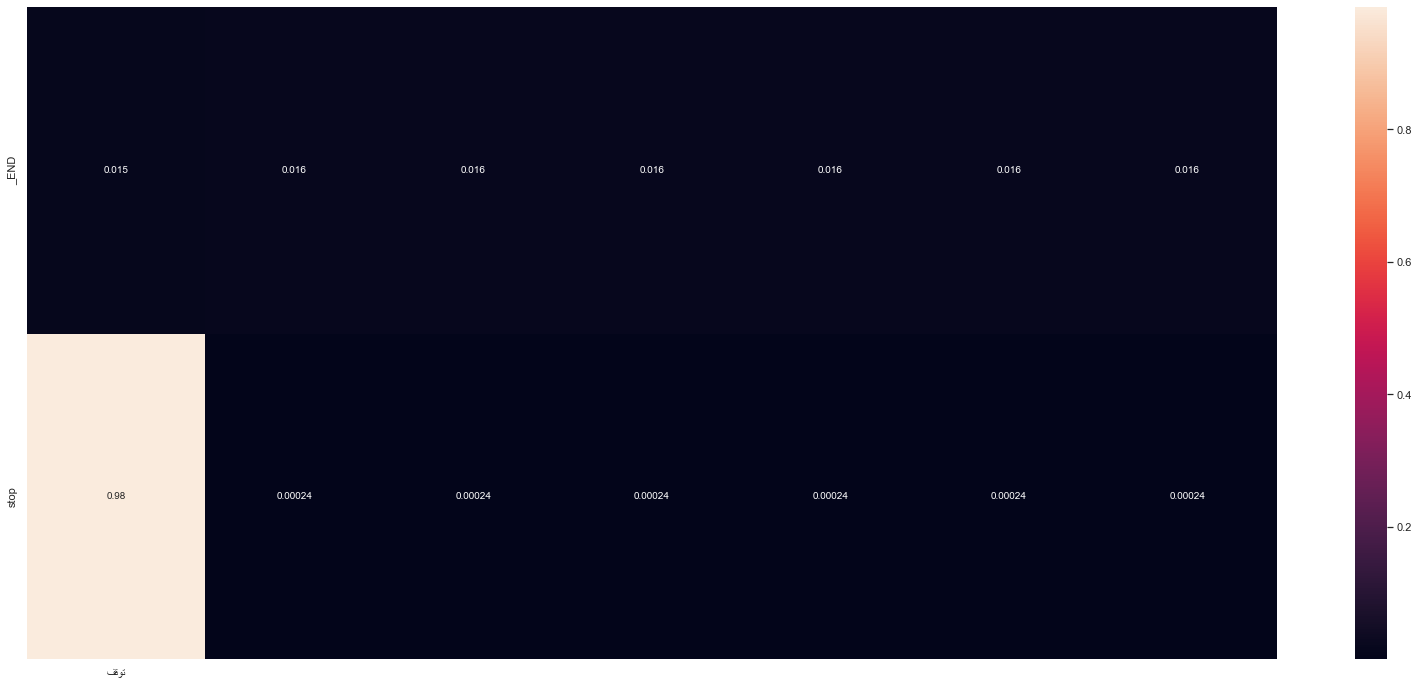

Decoded sentence: stop _END
-
Input sentence: إنتظر
GT sentence: START_ wait _END
***
9
wait _END
(2, 64)


<Figure size 432x288 with 0 Axes>

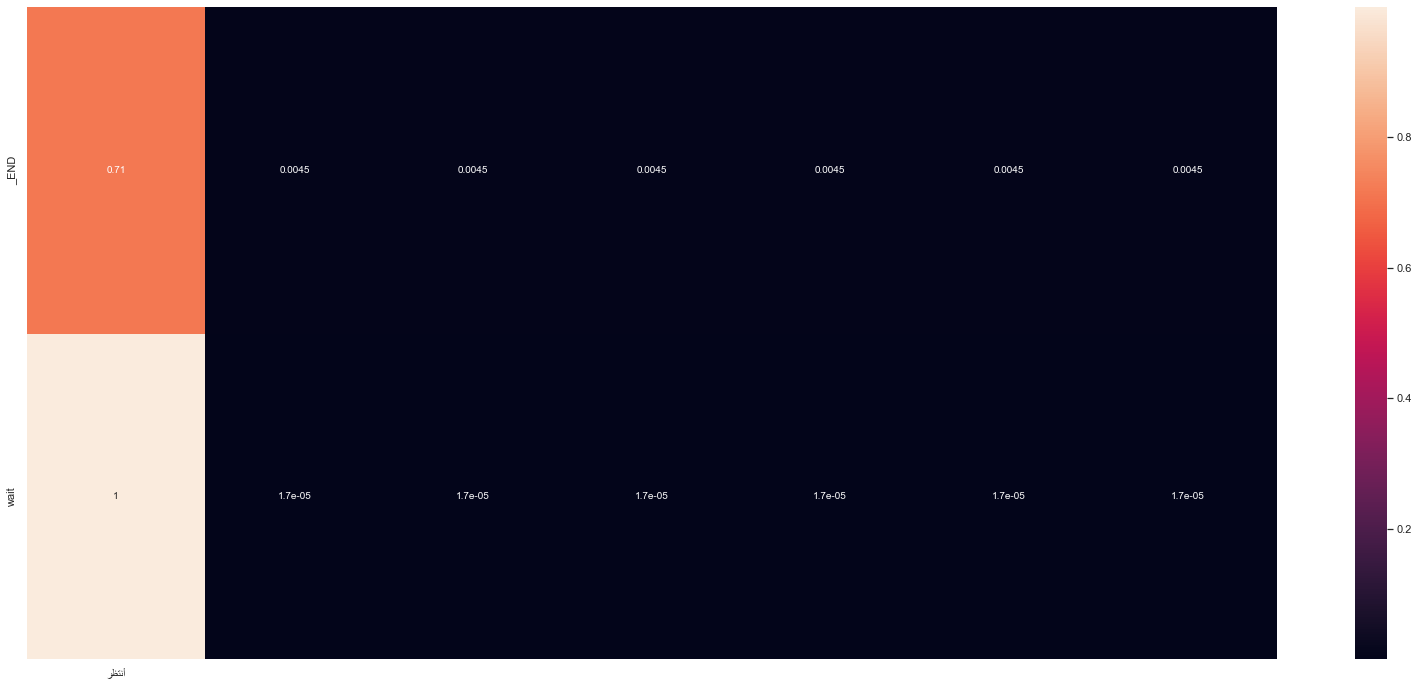

Decoded sentence: wait _END


In [304]:
for seq_index in range(10):

    target_text = dataset.English_target[seq_index]
    text = dataset.Arabic_input[seq_index]
    print('-')
    print('Input sentence:', text)    
    print('GT sentence:', target_text)
    decoded_sentence = visualize_attention(text, encoder_model, decoder_model, max_encoder_seq_length, num_decoder_tokens, input_token_index, reverse_target_tok_index,
                                           tokenized_ds_copy['Arabic_input'][seq_index], tokenized_ds_copy['English_target'][seq_index])

    
    print('Decoded sentence:', decoded_sentence)   
